In [ ]:
import torchtext
import re
import numpy as np
from torchtext.data import get_tokenizer

In [ ]:
def flatten(container):
    for c in container:
        for i in c:
            yield i

In [ ]:
from typing import List, Callable
def get_ka_data(path_to_ka_data: str) -> List[str]:
    f = open(path_to_ka_data)
    N_DATA_WORDS = 10_000_000
    data = f.read(N_DATA_WORDS * 10)
    f.close()
    lines = data.splitlines()
    return lines

In [8]:
# TO CHANGE DATA SOURCE CHANGE THIS
get_data: Callable[str, List[str]] = lambda: get_ka_data('./no_en_data/ka_nse_train.txt')

In [9]:
# TODO: should we take functions out of notebook?
from geotok import _basic_georgian_normalize

In [10]:
# TO CHANGE TOKENIZATION METHOD CHANGE THIS
tokenizer = get_tokenizer(_basic_georgian_normalize)

In [11]:
tokenizer('20.20.2020 მაგარი თარიღია. ძვ.წ. 2020 წელიც მაგარი იყო.')

['20/20/2020',
 'მაგარი',
 'თარიღია',
 '.',
 'ძვ',
 ';',
 'წ',
 ';',
 '2020',
 'წელიც',
 'მაგარი',
 'იყო',
 '.']

In [12]:
original_data = get_data()

In [13]:
data = list(map(tokenizer, original_data))

In [14]:
data[10:12]

[['ძირს',
  'მანქანა',
  'რახრახებდა',
  'და',
  'გმინავდა',
  'ნახშირის',
  'მტვირთავ',
  'მუშასავით',
  ',',
  'რის',
  'ვაი-ვაგლახით',
  'რომ',
  'ადის',
  'ხოლმე',
  'ერთსა',
  'და',
  'იმავე',
  'კიბეზე',
  '.'],
 ['მაღლიდან',
  'კი',
  'გემბანზე',
  'წინ',
  'და',
  'უკან',
  'მოირნეთა',
  'ფეხის',
  'ბაკუნი',
  'ისმოდა',
  'ერთთავად',
  '.']]

## EDA (Exploratory Data Analysis)

In [15]:
len(data)

747373

In [16]:
# Concatenating data from multiple sources is fine for EDA
tokens = list(flatten(data))
tokens[10:15]

['გადმოტვირთვისას', 'მოხდა', 'ერთი', 'უცნაური', 'უბედური']

In [17]:
len(tokens)

11647566

In [18]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
word_frequencies = Counter(tokens)

In [20]:
word_cloud = WordCloud(width=1400, height=700, font_path="./fonts/bpg_dejavu_sans.otf", collocations = False, background_color = 'white').generate_from_frequencies(word_frequencies)

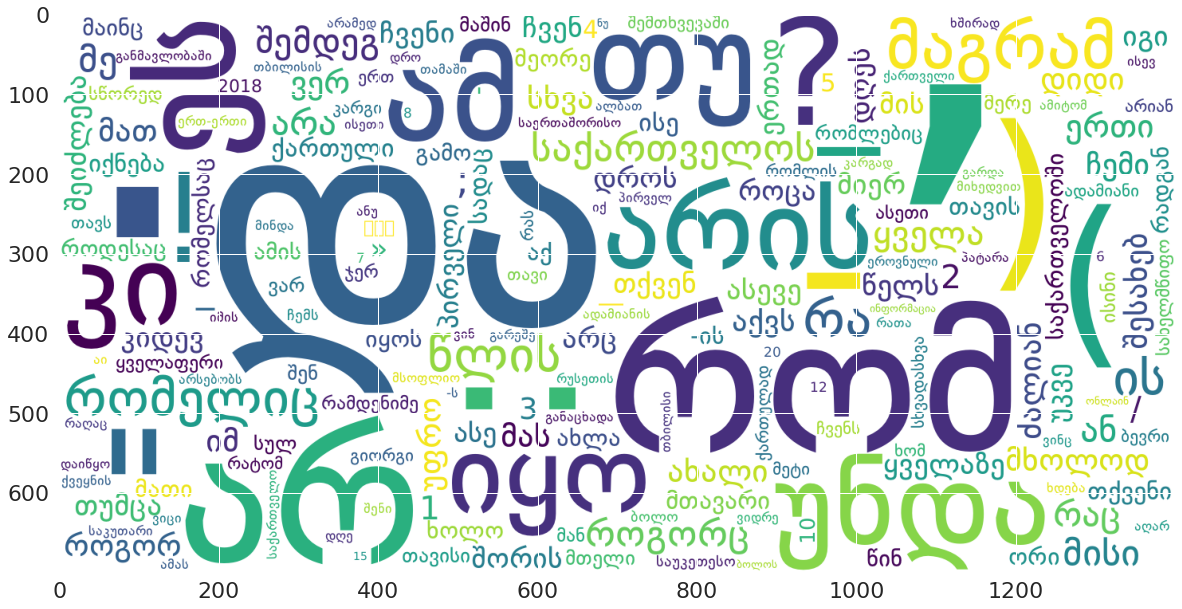

In [21]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.imshow(word_cloud);

In [22]:
from nltk import ngrams
import seaborn as sns
# sns.set(font_scale=2)

In [23]:
trigrams = Counter(ngrams(tokens, 3)).most_common(10)

In [24]:
trigram_data = [" ".join(trigram) for trigram, _ in trigrams]
trigram_freq = [freq for _, freq in trigrams]

In [25]:
sns.set(font_scale=2)

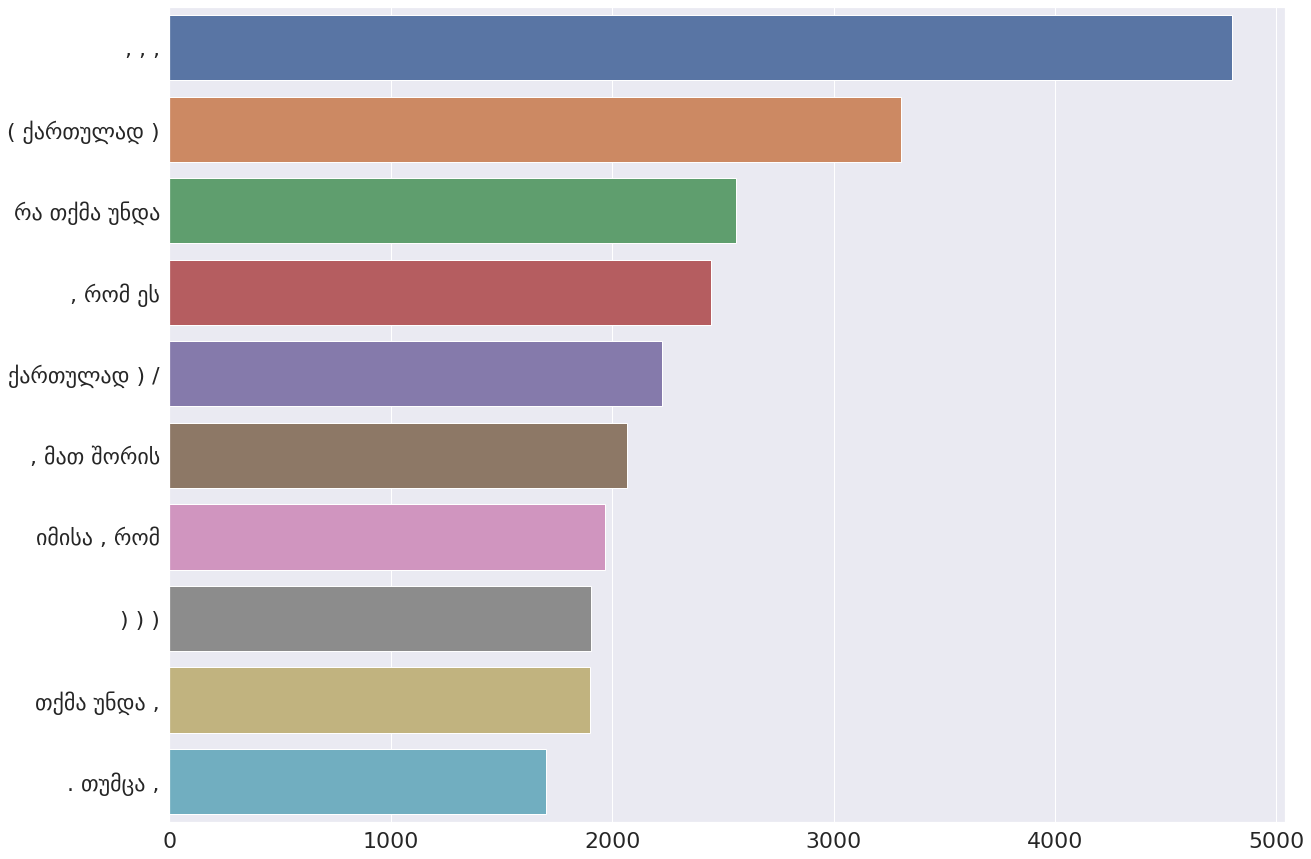

In [26]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=trigram_freq, y=trigram_data)
plt.show()